In [124]:
import torch
import matplotlib.pyplot as plt

In [4]:
# load the loads to word array 
words = open('names.txt','r').read().splitlines()

In [5]:
# print first 10 chars 
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
# length of the word array 
print(len(words))

32033


### Part A : Bi-gram level predictions based on the bi-gram frequency 

In [18]:
# max and min word length 
print(f'max length of a word in the words array = {max(len(w) for w in words)}')
print(f'min length of a word in the words array = {min(len(w) for w in words)}')

max length of a word in the words array = 15
min length of a word in the words array = 2


In [42]:
# create character bi-gram dictionary with bi-gram frequancy 
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram] = b.get(bigram,0) + 1

In [59]:
# first 20 bi-grams which has highest occurance (freq.)
sorted(b.items(),key = lambda kv : -kv[1])[:20]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422)]

In [91]:
# make encoder (chars->int) and decoder (int->chars)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] =0
itos = {i:s for s,i in stoi.items()}

In [81]:
# this will store the bi-gram freq. (first char along the row and second along the col.)
N = torch.zeros((27, 27), dtype=torch.int32)

for w in words:
    chs = ['.'] + list(w) + ['.']   # start and end with char "."
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

In [83]:
N[:3]

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0]], dtype=torch.int32)

In [87]:
# this is showing the probability of all the characters that can come after letter '.', i.e. N[0]
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [94]:
# we want to find the next char after letter 'a'
g = torch.Generator().manual_seed(2147483647)   # this is to make same output 
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'j'

In [ ]:
# P                   : 27,27
# P.sum(1,keepdims=T) : 27,1
# According to broadcasting rules this 

In [103]:
P = (N+1).float()   # here we add 1 to remve the zero probablities 
P /= P.sum(1,keepdims=True)
print(P[0])

tensor([3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
        1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
        4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
        5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
        4.2109e-03, 1.6719e-02, 2.9008e-02])


In [105]:
# let's try to generate few words completely based on the bi-gram probabilities (or count freq.)
g = torch.Generator().manual_seed(2147483647)  # generator 

for i in range(5):                             # generate 5 words 
    out = []
    ix = 0                                     # start with char '.'
    while True:
        p = P[ix]                              # pluck one raw of P 
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item() # get the next char index
        out.append(itos[ix])                   # append the next char to "out" list
        
        if ix ==0:                             # stop generating more chars if the current char is '.'
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


### Part B: Bi-gram level predictions using gradient descent optimization 

In [ ]:
# GOAL: maximize the likelyhood of data w.r.t. model parameters (statistical modeling)
# this is equivalent to the maximizing log likelyhood (note that log is monotonic)
# maximizing log-likelyhood is same as minimizing negetive log likelyhood
# so the final minimization is minimize the average negative log -likelyhood 

In [115]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
print(f'avergae negative log likelyhood :{-log_likelihood/n}')

avergae negative log likelyhood :2.4543561935424805


In [117]:
# let's create training set of bigrams (x,y)

xs,ys = [],[]

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [118]:
# this is the input (we have to one-hot encode)
xs

tensor([ 0,  5, 13, 13,  1])

In [119]:
# this is the target (output) of the network 
ys

tensor([ 5, 13, 13,  1,  0])

In [121]:
# let's one-hot encode the input 
import torch.nn.functional as F 
xenc = F.one_hot(xs,num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [122]:
xenc.shape

torch.Size([5, 27])

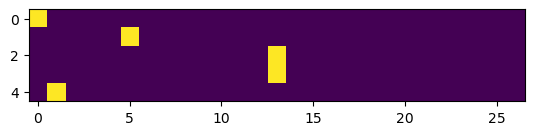

In [125]:
plt.imshow(xenc)

In [126]:
# weight matrix (input layer), the input size = 27 (chars) and lets make output size = 27 
# output_size = 27 is a fair argument (at least for now), as we insert one char (out of 27) and need to output another char (out of 27)

W = torch.randn((27,27))  # weight matrix (we initialize it with random numbers)
xenc @ W                  # this is the output 


tensor([[ 0.5808, -0.8380, -1.6012, -0.8973, -0.3310, -0.9583, -3.4900, -0.2898,
         -1.1250, -1.3915,  0.6740,  0.7394,  0.6449, -0.7010,  0.1348,  1.9231,
         -0.8642, -0.2792,  0.8307,  0.7118, -0.9412,  1.0937,  0.6939,  0.7933,
          0.0351,  1.5287, -1.1669],
        [ 0.2729,  0.0059,  0.4741,  1.0964,  0.0150, -0.1959, -0.0845,  0.1615,
          0.1401, -0.5514, -0.8819,  1.1796,  0.2331, -0.5123,  0.9737,  1.7076,
         -0.0155,  0.7088,  1.8451,  0.6656, -1.3579,  0.7288,  2.7356,  0.9770,
         -1.0882, -0.2033,  0.6832],
        [-0.1036, -0.6695,  0.6629,  0.6538, -0.1995,  1.4228, -0.2140, -0.1184,
         -0.4431, -0.2640, -0.6721, -1.3815,  2.2974,  0.7018, -2.0432,  0.6352,
         -0.4508,  1.5713, -0.6638,  0.9506, -0.6420, -0.9719, -0.3045, -0.7467,
         -0.7573, -1.8428,  0.4580],
        [-0.1036, -0.6695,  0.6629,  0.6538, -0.1995,  1.4228, -0.2140, -0.1184,
         -0.4431, -0.2640, -0.6721, -1.3815,  2.2974,  0.7018, -2.0432,  0.6352

In [127]:
# let's convert logits (network -outputs) into probabilities

logits = xenc @ W # logits, log-counts 
counts = logits.exp() # this is equivalent to counts N
probs = counts/counts.sum(1,keepdims=True)
probs

tensor([[0.0461, 0.0112, 0.0052, 0.0105, 0.0185, 0.0099, 0.0008, 0.0193, 0.0084,
         0.0064, 0.0506, 0.0540, 0.0491, 0.0128, 0.0295, 0.1764, 0.0109, 0.0195,
         0.0592, 0.0525, 0.0101, 0.0770, 0.0516, 0.0570, 0.0267, 0.1189, 0.0080],
        [0.0215, 0.0165, 0.0263, 0.0490, 0.0166, 0.0135, 0.0150, 0.0192, 0.0188,
         0.0094, 0.0068, 0.0532, 0.0207, 0.0098, 0.0433, 0.0903, 0.0161, 0.0333,
         0.1036, 0.0318, 0.0042, 0.0339, 0.2524, 0.0435, 0.0055, 0.0134, 0.0324],
        [0.0220, 0.0125, 0.0474, 0.0469, 0.0200, 0.1013, 0.0197, 0.0217, 0.0157,
         0.0187, 0.0125, 0.0061, 0.2428, 0.0492, 0.0032, 0.0461, 0.0156, 0.1175,
         0.0126, 0.0631, 0.0128, 0.0092, 0.0180, 0.0116, 0.0114, 0.0039, 0.0386],
        [0.0220, 0.0125, 0.0474, 0.0469, 0.0200, 0.1013, 0.0197, 0.0217, 0.0157,
         0.0187, 0.0125, 0.0061, 0.2428, 0.0492, 0.0032, 0.0461, 0.0156, 0.1175,
         0.0126, 0.0631, 0.0128, 0.0092, 0.0180, 0.0116, 0.0114, 0.0039, 0.0386],
        [0.0144, 0.0198,

In [146]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5),ys].log().mean() # this is the loss (negative log-likelyhood OR cross entrophy) 
loss

tensor(3.7693, grad_fn=<NegBackward0>)

In [147]:
# backward pass, we want to find the gradient of the loss w.r.t weights 
W.grad = None 
loss.backward()
W.data += -0.1*W.grad

In [149]:
# let's optimize the weights of the net using gradient-descent and get the bigram level predictions

# step 01: create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# step 02: gradient descent (after this weights are optimized to match the targets)
for k in range(50):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

In [157]:
# step 03: sample from the 'neural-net' model 

for i in range(5):
    out = []
    ix = 0 
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits = xenc @ W 
        counts = logits.exp()
        p = counts/counts.sum(1,keepdims=True)
        
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        
        if ix ==0:
            break 
    print(''.join(out))
        

kadarekan.
ljagkin.
mfian.
kicnaylula.
jvy.
